# Simple Linear Regression

### Imports

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab

DATA_DIR='data/'

### Load Data

In [27]:
dataset = np.loadtxt(DATA_DIR+'linear.csv',skiprows=1, delimiter=",", usecols=(2,4))

In [28]:
x = dataset[:,0]
y = dataset[:,1]
print x[:5]
print y[:5]

[ 37.8  39.3  45.9  41.3  10.8]
[ 22.1  10.4   9.3  18.5  12.9]


### Predict Function

y = mx + b

B (bias) is called the intercept because it determines where the line intercepts the y-axis. In machine learning we can call this the bias, because it is added to offset all predictions that we make. 

M (slope) is called the slope because it defines the slope of the line or how x translates into a y value before we add our bias.

In [29]:
def predict(x, m, b):
    return m*x + b

### Cost Function

The predict function is nice, but for our purposes we don't really need  it. What we need is a cost function so we can find the derivative and start optimizing our weights. 

For our purposes, lets use Mean Squared Error. The formula is:

1/N * SUM[ (y - (mx + b))^2 ]

* N number of observations
* SUM[ ] summation after iterating through all data points

In [30]:
# Mean Squared Error (MSE)
def cost_function(x, y, m, b):
    N = len(x)
    total_error = 0.0
    for i in range(N):
        total_error += (y[i] - (m*x[i] + b))**2
    return total_error / N

In [31]:
m = 0.0
b = 0.0
cost_function(x, y, m, b)

223.71625000000003

### Gradient Descent

To minimize our error we need to calculate the gradient of our cost function. The gradient has two partial derivatives: d/dm and d/db. To find the partial derivatives of the MSE cost function, we need to use the chain rule. A good explanation of the math behind this can be found [here](https://www.youtube.com/watch?v=WnqQrPNYz5Q).

We need the chain rule because (y - (mx + b))^2 is really 2 nested functions, inner = y-mx+b and outer = x^2. More info in our [wiki](http://wiki.fast.ai/index.php/Calculus_for_Deep_Learning#Chain_Rule). The result is the following partial derivatives:

* d/dm = -2x(y - (mx + b))
* d/db = -2(y - (mx + b))

For each sample, we calculate the derivative, divide by N to take the mean, and subtract from the current derivative total we are calculating. The derivative equation returns the direction of steepest ASCENT, so we need to reverse this to reduce our error function. 

In [32]:
def update_weights(m, b, x, y, learning_rate):
    m_deriv = 0
    b_deriv = 0
    N = len(x)
    for i in range(N):
        # Calculate partial derivatives
        # -2x(y - (mx + b))
        m_deriv += -2*x[i] * (y[i] - (m*x[i] + b))
        
        # -2(y - (mx + b))
        b_deriv += -2*(y[i] - (m*x[i] + b))

    # We subtract because the derivatives point in direction of steepest ascent
    m -= (m_deriv/float(N)) * learning_rate
    b -= (b_deriv/float(N)) * learning_rate

    return m, b

### Train

In [33]:
def train(m, b, x, y, lr, num_iters):
    error_history = []
    for i in range(num_iters):
        m,b = update_weights(m, b, x, y, lr)
        error = cost_function(x, y, m, b)
        error_history.append(error)
        if i % 10 == 0:
            graph_prediction_line(x, y, m, b)
            print "iter="+str(i) + "  m="+str(round(m,5)) + "  b="+str(round(b,5)) + "  cost="+str(round(error,3))
    print "iter="+str(i) + "  m="+str(round(m,5)) + "  b="+str(round(b,5)) + "  cost="+str(round(error,3))
    return m,b,error_history

### Visualize

In [38]:
def graph_error(error_history):
    iterations = [i for i in range(1,len(error_history)+1)]
    plt.plot(iterations, error_history)
    plt.title('Error Rate')
    plt.xlabel('Training Iterations')
    plt.ylabel('Mean Squared Error')
    plt.show()
    
def graph_prediction_line(x, y, m, b):
    predictions = [predict(x[i], m, b) for i in range(len(x))]
    plt.scatter(x, y)
    plt.plot(x, np.poly1d(np.polyfit(x, predictions, 1) ) (x))
    plt.title('Learned Regression Line')
    plt.xlabel('Radio')
    plt.ylabel('Sales')
    plt.show()

### Run

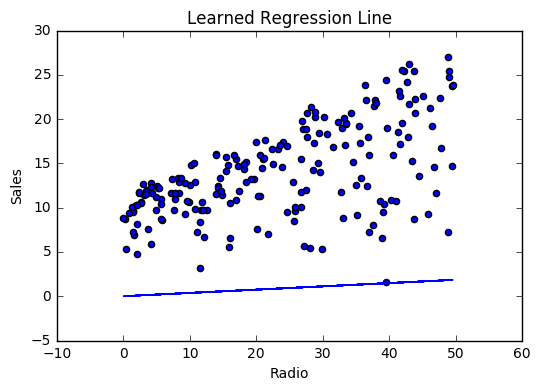

iter=0  m=0.03706  b=0.0014  cost=197.25


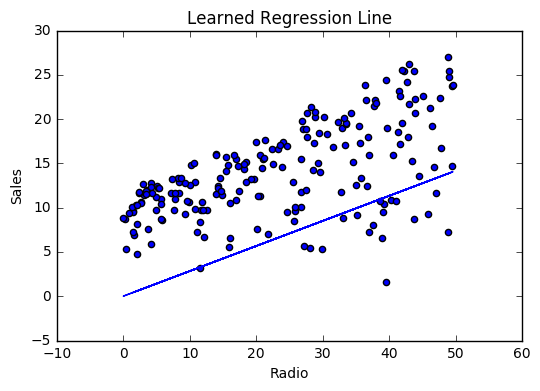

iter=10  m=0.28307  b=0.01161  cost=74.656


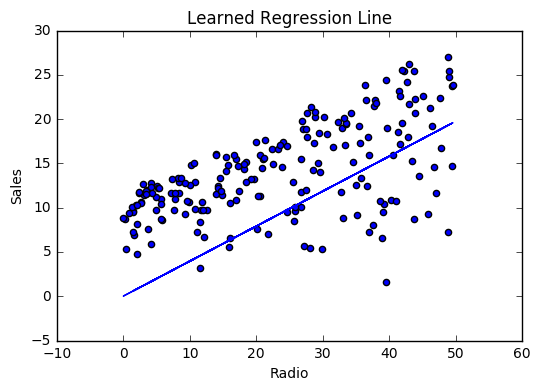

iter=20  m=0.39447  b=0.0177  cost=49.484


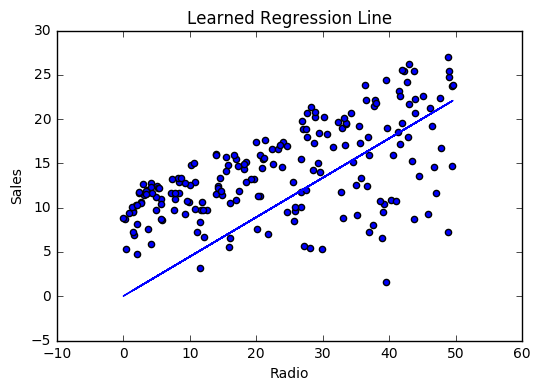

iter=30  m=0.44489  b=0.02192  cost=44.306
iter=39  m=0.46614  b=0.02498  cost=43.28


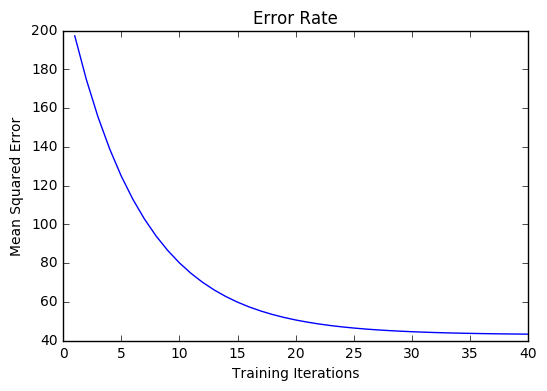

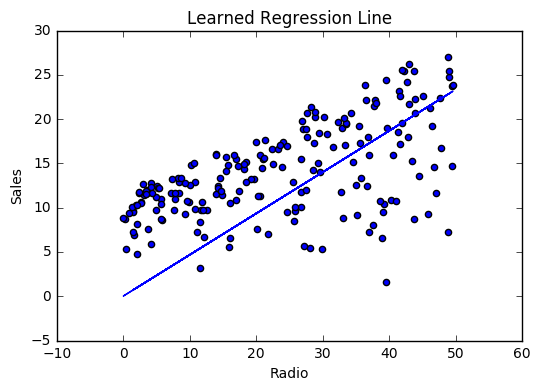

In [39]:
def run():
    x = dataset[:,0]
    y = dataset[:,1]
    
    # Initialize weights (m and b)
    m = 0.0
    b = 0.0
    
    # Hyperparameters
    learning_rate = 0.00005
    num_iters = 40
    
    m,b,errs = train(m, b, x, y, learning_rate, num_iters)

    #Chart errs
    graph_error(errs)
    graph_prediction_line(x, y, m, b)
run()